In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
pred_test=pd.read_csv('mobile__val_proba_nlp.csv')

In [4]:
pred_test[['pred','itemid']].head()

,pred,itemid
0,34,1058517290
1,35,1195506745
2,32,1833821649
3,34,291297752
4,31,1812460647


In [5]:
train.set_index('itemid',inplace=True)

In [6]:
train_m=train.loc[pred_test.itemid,:]

In [7]:
train_m['pred']=pred_test.pred.values

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
accuracy_score(train_m.Category,train_m.pred)

0.82819273351005773

In [10]:
train_m['pred_true']=(train_m['Category']==train_m['pred'])

In [11]:
train_m.groupby('Category').pred_true.mean()

Category
31    0.895994
32    0.902201
33    0.939834
34    0.819633
35    0.557045
36    0.927184
37    0.859031
38    0.933050
39    0.899281
40    0.676923
41    0.926204
42    0.922381
43    0.879577
44    0.902174
45    0.904328
46    0.941606
47    0.814815
48    0.903614
49    0.443478
50    0.892857
51    0.814815
52    0.565217
53    0.642857
54    0.783333
55    0.933333
56    0.558824
57    0.000000
Name: pred_true, dtype: float64

In [12]:
df_cat=pd.read_json('categories.json')

In [13]:
cat_m=df_cat['Mobile'].dropna()

In [14]:
cat=cat_m

In [15]:
cat_df=pd.DataFrame({'index':cat.values.astype('int'),'name':cat_m.index})
cat_df.set_index('index',inplace=True)

In [16]:
train_m['Category_name']=train_m['Category'].map(cat_df['name'])

In [17]:
train_m.head()

,title,Category,image_path,pred,pred_true,Category_name
itemid,,,,,,
1058517290,xiaomi mi a1 garansi resmi 1 tahun tam,34,mobile_image/3912586cdf51144db783b2bac1ee4d3f.jpg,34,True,Xiaomi
1195506745,promo discon samsung galaxy s7 flat sein garan...,35,mobile_image/bb327fec3989b18f714deb3c07203fb8.jpg,35,True,Others Mobile & Tablet
1833821649,samsung galaxy a6 plus 2018 new garansi nasional,35,mobile_image/8959112348969556df29f24d06ecff8f.jpg,32,False,Others Mobile & Tablet
291297752,xiaomi redmi mi5,34,mobile_image/8733bba77a727e4771d51b5a8b48c8a5.jpg,34,True,Xiaomi
1812460647,monggo diorder iphone 6s,31,mobile_image/af7047829e497014daa5c2b4914a0fb4.jpg,31,True,Iphone


In [18]:
train_m.groupby('Category_name').pred_true.mean()

Category_name
Advan                     0.904328
Alcatel                   0.933333
Asus                      0.879577
Blackberry                0.927184
Brandcode                 0.899281
Evercoss                  0.902174
Honor                     0.783333
Huawei                    0.814815
Icherry                   0.565217
Infinix                   0.676923
Iphone                    0.895994
Lenovo                    0.859031
Maxtron                   0.558824
Mito                      0.941606
Motorola                  0.443478
Nokia                     0.933050
Oppo                      0.926204
Others Mobile & Tablet    0.557045
Realme                    0.814815
SPC                       0.000000
Samsung                   0.902201
Sharp                     0.903614
Smartfren                 0.642857
Sony                      0.939834
Strawberry                0.892857
Vivo                      0.922381
Xiaomi                    0.819633
Name: pred_true, dtype: float64

In [19]:
# Let's check iphone

In [20]:

from IPython.core.display import Image, display


In [21]:
train['Group']=train['image_path'].map(lambda x: x[:7])
test['Group']=test['image_path'].map(lambda x: x[:7])

In [22]:
false_iphone=train_m[(train_m.Category_name=='Iphone')&(train_m.pred_true==False)]

In [23]:
false_iphone.image_path.iloc[1]

'mobile_image/8178859a9bf0f5f2869d3de6b336e8bb.jpg'

In [24]:
train[train.Group=='mobile_'].image_path.iloc[0]

'mobile_image/a9c8f0fdd6587deed197634066cf7eee.jpg'

In [25]:
import matplotlib.pylab as plt

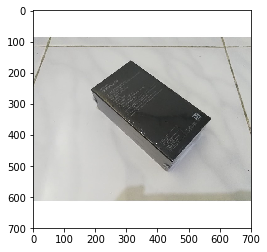

In [26]:
img=plt.imread(false_iphone.image_path.iloc[1])
plt.imshow(img)

In [27]:
def show_im(df_train):
    plt.figure(figsize=(20,20))
    df=df_train.sample(n=9)
    for i in range(9):
        y=331+i
        plt.subplot(y)
        img=plt.imread(df.image_path.iloc[i])
        plt.imshow(img)
        if len(false_iphone.title.iloc[i])>40:
            plt.text(0,-40,df.title.iloc[i][:40],fontsize=16)
            plt.text(0,-10,df.title.iloc[i][40:],fontsize=16)
        else:
            plt.text(0,-10,df.title.iloc[i],fontsize=16)

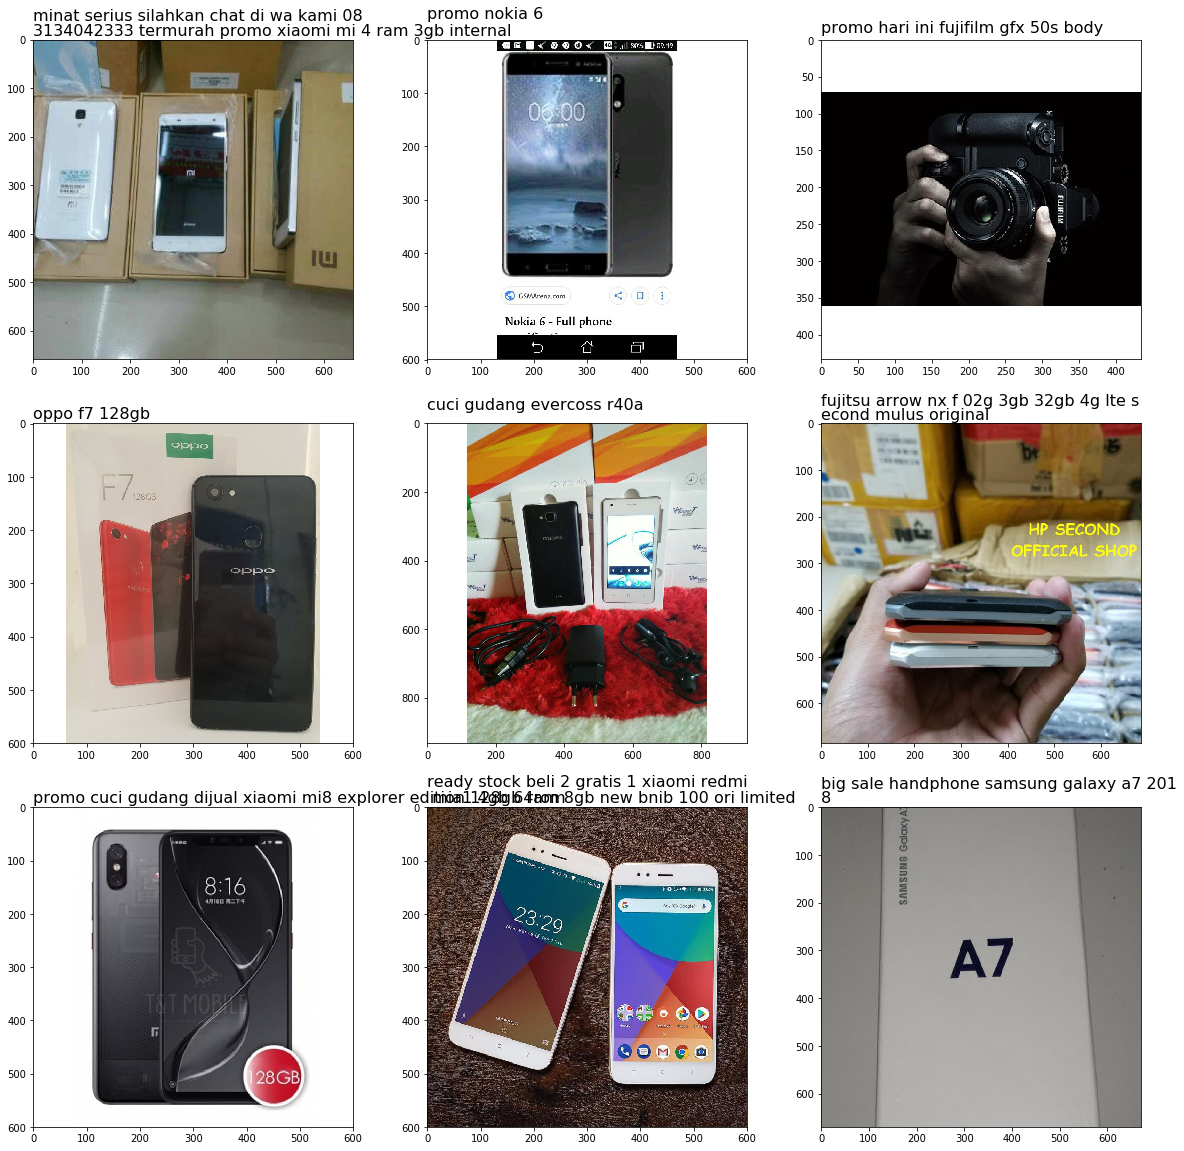

In [34]:
show_im(false_iphone)

In [35]:
train[train.Group=='mobile_'].loc[506285]

itemid                                                  2346660
title         apple iphone 4s back glass spare part original...
Category                                                     31
image_path    mobile_image/a9c8f0fdd6587deed197634066cf7eee.jpg
Group                                                   mobile_
Name: 506285, dtype: object

In [36]:
show_image(train[train.Group=='mobile_'].loc[506285])

apple iphone 4s back glass spare part original replacement putih
